In [1]:
def get_bets():
    
    conn = None
    db_params = {
        'host': 'localhost',
        'database': 'preds',
        'user': 'postgres',
        'password': 'pass',
        'port': '5432'
    }
    #get next friday and monday dates as start and end for query

    try:
        conn = psycopg2.connect(**db_params)

        query = '''
    SELECT br.*, b.bet_value 
    FROM bets_results br
    JOIN bets b
    ON br.bet_name = b.bet_name AND br.fixture_id = b.fixture_id
    '''
        current_matches = pd.read_sql_query(query, conn)
        
        return current_matches
    except Exception as e:
        print(f'Error {e}')
        return None, None
    finally:
        if conn is not None:
            conn.close()


In [2]:
import pandas as pd
import psycopg2

df = get_bets()

df1 = df.groupby('bet_number')['bet_value'].prod().reset_index()
df1 = df1.rename(columns={'bet_value':'summed_val'})
df2 = df.merge(df1, on='bet_number')

C:\Users\olows\AppData\Local\Temp\ipykernel_14036\2089369644.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  current_matches = pd.read_sql_query(query, conn)


In [3]:
df_won = df2[df2['bet_result']]
won_bets = len(list(df_won['bet_number'].unique()))
df_won = df_won.groupby('bet_number')['summed_val'].max().reset_index()

df_lost = df2[~df2['bet_result']]

lost = len(list(df_lost['bet_number'].unique()))*10
df_won['won'] = df_won['summed_val']*10
won = df_won['won'].sum()

money_used = len(list(df['bet_number'].unique()))*10
incomes = won - money_used

In [4]:
lost

290

In [5]:
won

411.90000000000003

In [6]:
incomes

1.900000000000034

In [7]:
money_used

410

In [8]:
df3 = df2.drop_duplicates(subset=['bet_number'])


acc_by_bet_name = df3.groupby(['bet_name', 'bet_result']).size().reset_index(name='num')

match_acc_by_bet_name = df2.groupby(['bet_name', 'bet_result']).size().reset_index(name='num')

df3['cash'] = df3.apply(lambda row: (row['summed_val']*10)-10 if row['bet_result'] else -10, axis=1)

incomes = df3.groupby('bet_name')['cash'].sum()

C:\Users\olows\AppData\Local\Temp\ipykernel_14036\2350901009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cash'] = df3.apply(lambda row: (row['summed_val']*10)-10 if row['bet_result'] else -10, axis=1)


In [17]:
df.head(15)

,fixture_id,bet_name,bet_number,match_result,bet_result,bet_value
0,1164790,home_over_1,1,True,True,1.30
1,1179037,home_over_1,1,True,True,2.10
2,1152187,home_over_1,2,True,True,4.10
3,1152189,home_over_1,3,True,True,2.69
4,1195622,away_over_1,4,False,False,6.00
5,1179230,away_over_1,4,True,False,12.50
6,1195620,away_over_1,5,False,False,4.20
7,1179226,away_over_1,6,True,True,6.30
8,1179225,away_over_1,7,False,False,10.50
9,1164790,fh_result,8,False,False,6.50


In [10]:
acc_by_bet_name

,bet_name,bet_result,num
0,away_over_1,False,6
1,away_over_1,True,1
2,double_chance_away,False,10
3,double_chance_away,True,3
4,double_chance_home,False,2
5,double_chance_home,True,1
6,fh_result,False,5
7,fh_result,True,3
8,home_over_1,True,3
9,result,False,6


In [11]:
match_acc_by_bet_name

,bet_name,bet_result,num
0,away_over_1,False,11
1,away_over_1,True,1
2,double_chance_away,False,16
3,double_chance_away,True,3
4,double_chance_home,False,6
5,double_chance_home,True,1
6,fh_result,False,5
7,fh_result,True,3
8,home_over_1,False,1
9,home_over_1,True,4


In [12]:
incomes

bet_name
away_over_1           -7.0
double_chance_away   -41.7
double_chance_home    10.0
fh_result             15.4
home_over_1           65.2
result               -40.0
Name: cash, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

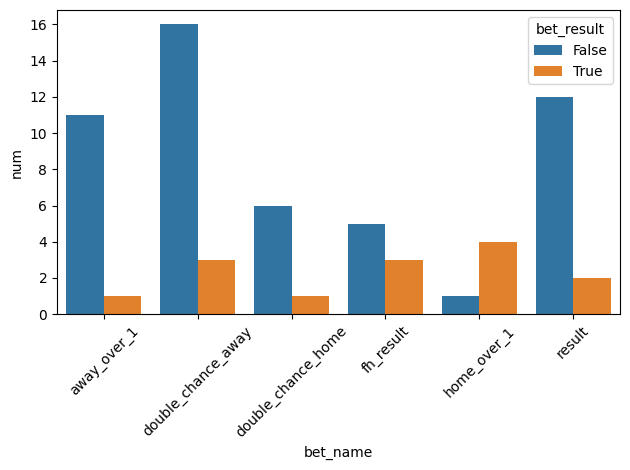

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#incomes.plot(kind='bar')
#plt.tight_layout()


sns.barplot(x='bet_name', y='num', hue='bet_result', data=match_acc_by_bet_name)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [24]:
import json
from datetime import date, timedelta
t = date.today()
t += timedelta(1)
with open('data/odds.json','w') as f:
    json.dump((t.isoformat(), []), f)

In [9]:
a = (t, [1,2,3,4,5,6])

In [13]:
t.isoformat()

'2024-07-19'

In [17]:
with open('data/odds.json','r') as f:
    ass = json.load(f)

In [23]:
if ass[0] == t.isoformat():
    print('a')
else:
    print('b')

a
